In [1]:
# Import all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.metrics import accuracy_score
import os
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import datetime

In [2]:
# Get current directory
dirpath = os.getcwd()
print("current directory is : " + dirpath)

current directory is : /home/someshugar


In [3]:
# Get file path
day_file = "/home/someshugar/Project 1/day.csv"

In [4]:
# Read file  using pandas and check shape
df = pd.read_csv(day_file)
print(df.shape)

(731, 16)


In [5]:
# View and analyse head of the Dataframe
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [6]:
# Drop instant column
df = df.drop(['instant'], axis=1)

In [7]:
df.dtypes

dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [8]:
# Date time conversion
df.dteday = pd.to_datetime(df.dteday, format='%Y-%m-%d')

In [9]:
df['day'] = df['dteday'].dt.day

In [10]:
# Categorical variables
for column in ['season', 'holiday', 'weekday', 'workingday', 'weathersit','yr']:
    df[column] = df[column].astype('category')

In [11]:
df.dtypes

dteday        datetime64[ns]
season              category
yr                  category
mnth                   int64
holiday             category
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
day                    int64
dtype: object


Also, we’ll already delete the fields dteday, instant and yr. We won’t need instant since it’s only an index.
yr is not important because years don’t ‘repeat’ like months or days of the week, so it doesn’t
really add a prediction element to future information.

In [12]:
df.describe()

,mnth,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,6.519836,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,15.738714
std,3.451913,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452,8.809949
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,1.000000
25%,4.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,8.000000
50%,7.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,16.000000
75%,10.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,23.000000
max,12.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,31.000000


In [13]:
# Find columns with NaN
df.isnull().sum(axis=0)

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
day           0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
dteday        731 non-null datetime64[ns]
season        731 non-null category
yr            731 non-null category
mnth          731 non-null int64
holiday       731 non-null category
weekday       731 non-null category
workingday    731 non-null category
weathersit    731 non-null category
temp          731 non-null float64
atemp         731 non-null float64
hum           731 non-null float64
windspeed     731 non-null float64
casual        731 non-null int64
registered    731 non-null int64
cnt           731 non-null int64
day           731 non-null int64
dtypes: category(6), datetime64[ns](1), float64(4), int64(5)
memory usage: 62.4 KB


# Exploratory Data Analysis

Bike sharing utilization over the two years
The objective of this Case is to Predication of bike rental count on daily based on the environmental and seasonal settings.

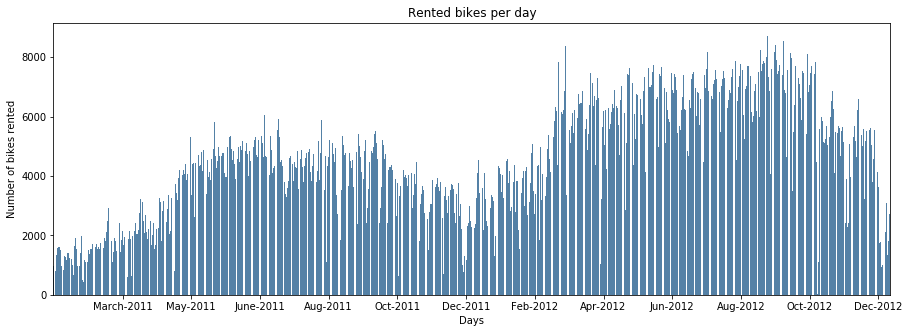

In [15]:
# Total_bikes rented count per day
fig, ax = plt.subplots(figsize=(15,5))
fig = sns.barplot(x = df.dteday, y = df.cnt,color = 'steelblue') \
   .axes.set_xticklabels(['March-2011', 'May-2011', 'June-2011', 'Aug-2011', 'Oct-2011', 'Dec-2011',
                          'Feb-2012', 'Apr-2012','Jun-2012','Aug-2012','Oct-2012','Dec-2012'])
ax.set(xlabel='Days', ylabel='Number of bikes rented', title='Rented bikes per day')
plt.xticks([60,120,180,240,300,360,420,480,540,600,660,720])
plt.savefig('Figure1.png')
plt.show()

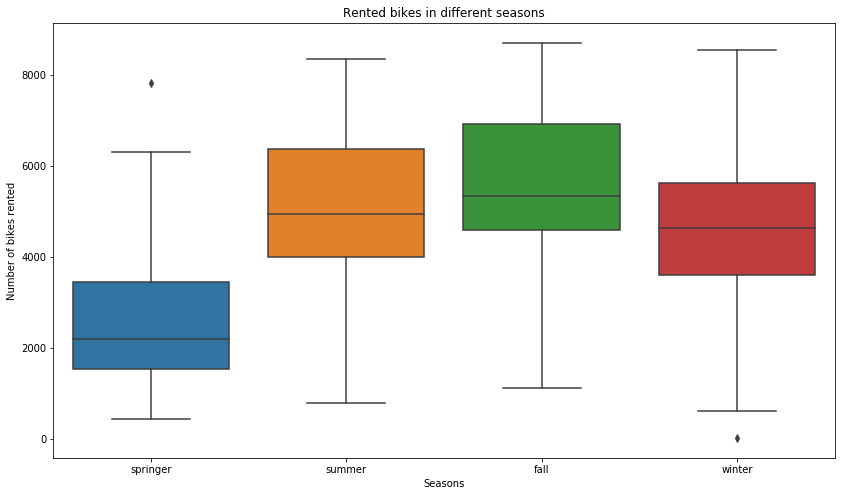

In [16]:
# Box plot of Rented bikes in different seasons
fig, ax = plt.subplots(figsize=(14,8))
fig = sns.boxplot(x='season', y='cnt', data=df, ax=ax)
ax.set(xlabel='Seasons', ylabel='Number of bikes rented', title='Rented bikes in different seasons')
seasons=['springer','summer', 'fall', 'winter']
ax.set_xticklabels(seasons)
plt.savefig('Figure2.png')
plt.show()

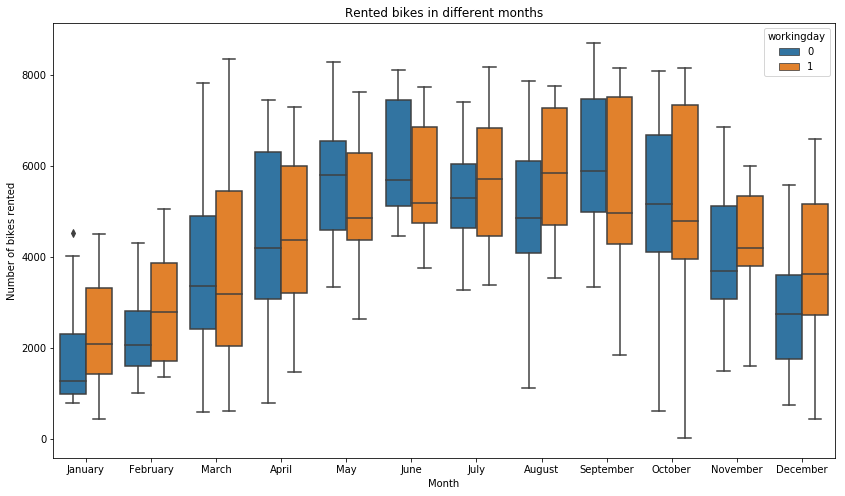

In [17]:
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='mnth', y='cnt',hue='workingday', data=df, ax=ax)
ax.set(xlabel='Month', ylabel='Number of bikes rented', title='Rented bikes in different months')
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(months)
plt.savefig('Figure3.png')
plt.show()

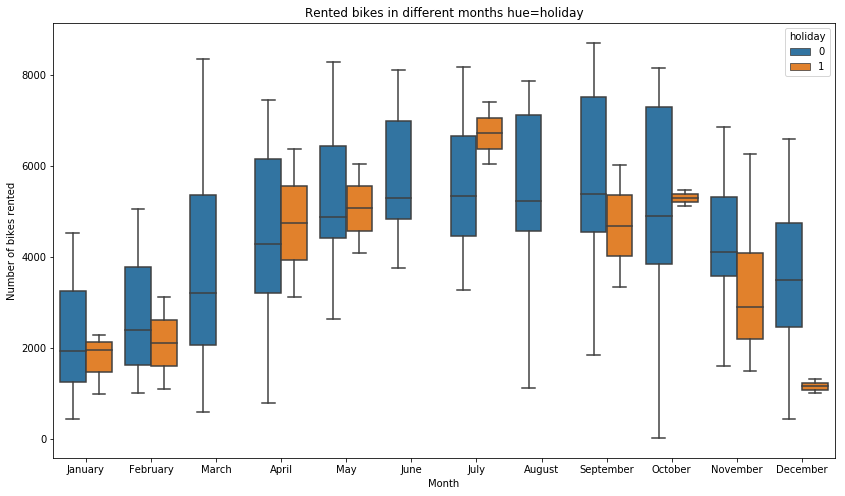

In [18]:
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='mnth', y='cnt',hue='holiday', data=df, ax=ax)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
ax.set(xlabel='Month', ylabel='Number of bikes rented', title='Rented bikes in different months hue=holiday')
ax.set_xticklabels(months)
plt.savefig('Figure4.png')
plt.show()

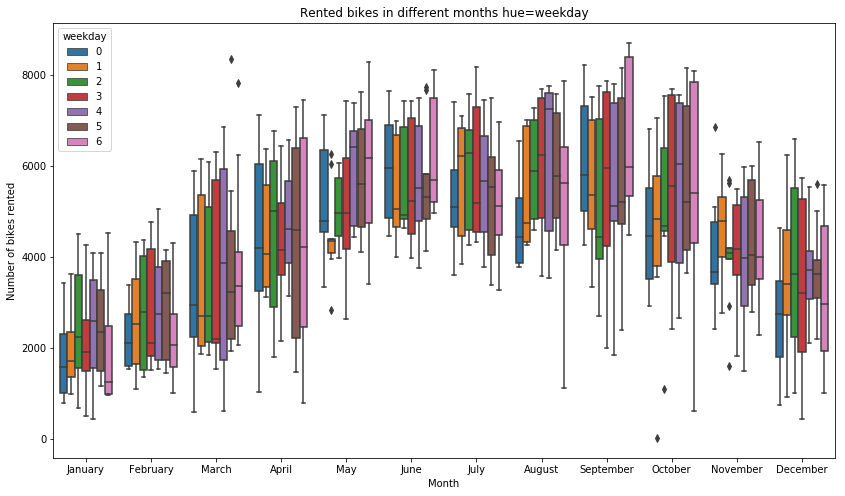

In [19]:
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='mnth', y='cnt',hue='weekday', data=df, ax=ax)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']
ax.set_xticklabels(months)
ax.set(xlabel='Month', ylabel='Number of bikes rented', title='Rented bikes in different months hue=weekday')
plt.savefig('Figure5.png')
plt.show()

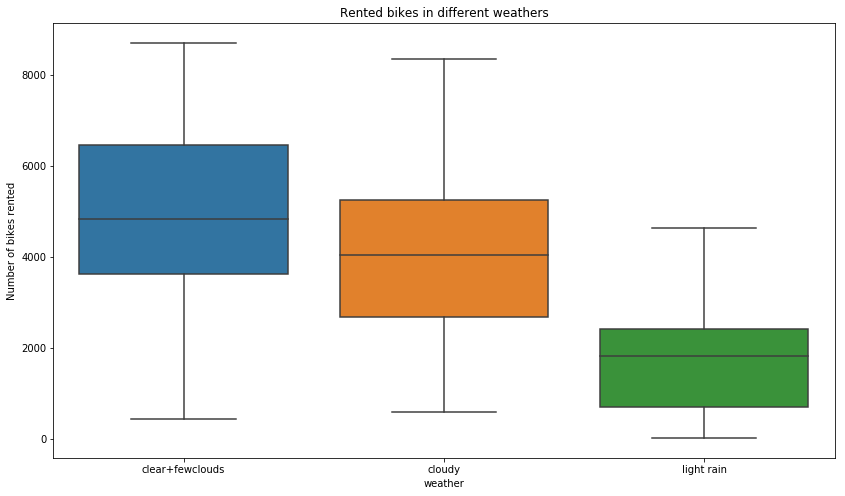

In [20]:
fig, ax = plt.subplots(figsize=(14,8))
sns.boxplot(x='weathersit', y='cnt', data=df, ax=ax)
ax.set(xlabel='weather', ylabel='Number of bikes rented', title='Rented bikes in different weathers')
weather = ['clear+fewclouds', 'cloudy', 'light rain','heavy rain']
ax.set_xticklabels(weather)
plt.savefig('Figure6.png')
plt.show()

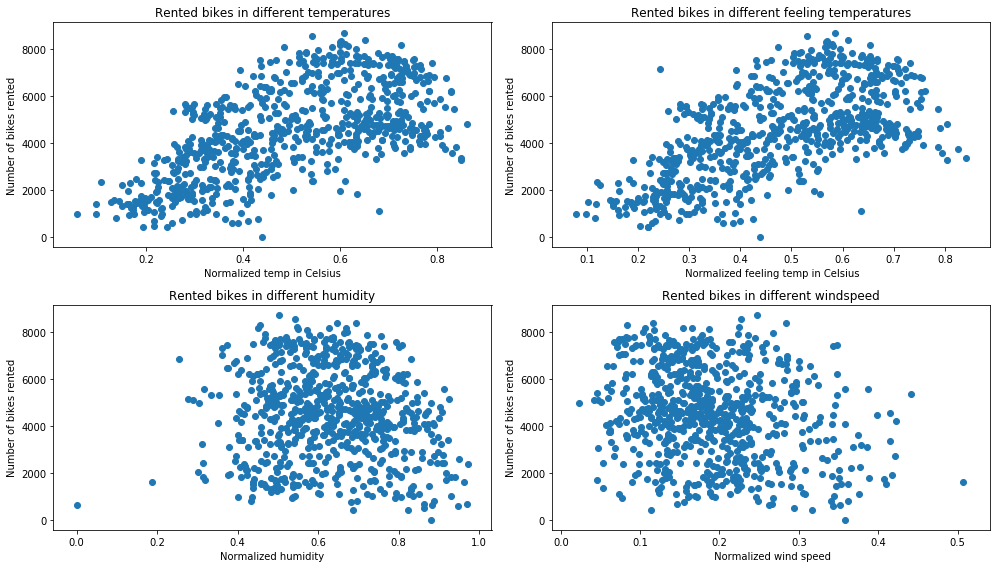

In [21]:
fig= plt.subplots(figsize=(14,8))
axes1 = plt.subplot(2, 2, 1)
axes2 = plt.subplot(2, 2, 2)
axes3 = plt.subplot(2, 2, 3)
axes4 = plt.subplot(2, 2, 4)

axes1.scatter(x='temp', y='cnt', data=df)
axes2.scatter(x='atemp', y='cnt', data=df)
axes3.scatter(x='hum', y='cnt', data=df)
axes4.scatter(x='windspeed', y='cnt', data=df)

axes1.set(xlabel='Normalized temp in Celsius', ylabel='Number of bikes rented', title='Rented bikes in different temperatures')
axes2.set(xlabel=' Normalized feeling temp in Celsius', ylabel='Number of bikes rented', title='Rented bikes in different feeling temperatures')
axes3.set(xlabel='Normalized humidity', ylabel='Number of bikes rented', title='Rented bikes in different humidity')
axes4.set(xlabel=' Normalized wind speed', ylabel='Number of bikes rented', title='Rented bikes in different windspeed')
plt.tight_layout()
plt.savefig('Figure7.png')
plt.show()

# Correlation Analysis
A correlation analysis will allow to identify relationships between the dataset variables. A plot of their distributions
highlighting the value of the target variable might also reveal some patterns.

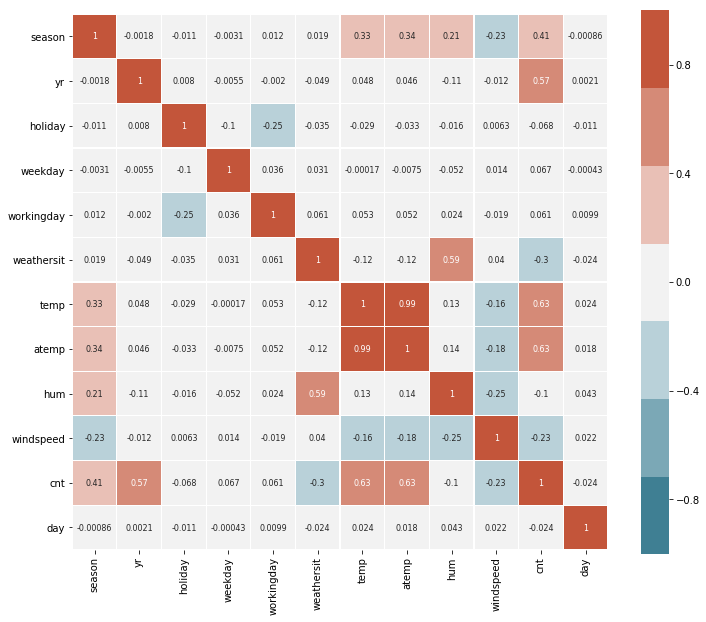

In [22]:
df_columns =['mnth', 'casual', 'registered','dteday']
df = df.copy()
days_df_corr = df.drop(df_columns, axis=1)
for column in days_df_corr.columns:
    days_df_corr[column] = days_df_corr[column].astype('float')
    
plt.figure(figsize=(12, 10))
sns.heatmap(days_df_corr.corr(), 
            cmap=sns.diverging_palette(220, 20, n=7), vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)
plt.savefig('Figure8.png')
plt.show()

From the above correlation plots actual temperature is more correlated with bike rentals count, humidity and wind speed 
are also slightly correlated.Temperature and actual are highly  correlated.

Another problem are our registered and casual variables. Think about it: imagine that you are trying to predict the total number of users for tomorrow. While you can have data such as the month, the weekday, the temperature and the weather condition, it’s impossible to have the number of registered and casual users because this is exactly what you are trying to predict.

Also, since the count is a decomposition of these two variables, we could have problems if they remain on the data set. So, let’s get rid of them too.


In [23]:
df = df.drop(['dteday', 'atemp', 'casual', 'registered'], axis=1)

In [24]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,day
0,1,0,1,0,6,0,2,0.344167,0.805833,0.160446,985,1
1,1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801,2
2,1,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349,3
3,1,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562,4
4,1,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600,5


# One Hot Encoding
Since we have categorical values in our data set, we need to ‘tell’ our algorithm that classes have equal weight for our analysis. For instance: our weekdays are represented by numbers from 0 to 6. But we can’t really say that a 6 is better than a 5 here.

A way to change this perspective is using the one hot encoding technique. This is a process by which we convert categorical variables into binary categories. By the way, when we apply one hot encoding, it’s important to left one variable out to avoid multicollinearity. 



In [25]:
df_dummy = df

def dummify_dataset(df, column):       
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column, drop_first=True)],axis=1)
    df = df.drop([column], axis=1)
    return df

columns_to_dummify = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for column in columns_to_dummify:
    df_dummy = dummify_dataset(df_dummy, column)
    
df_dummy.head()

,yr,temp,hum,windspeed,cnt,day,season_2,season_3,season_4,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,0,0.344167,0.805833,0.160446,985,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.363478,0.696087,0.248539,801,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.196364,0.437273,0.248309,1349,3,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0.200000,0.590435,0.160296,1562,4,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0.226957,0.436957,0.186900,1600,5,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [26]:
y = df_dummy['cnt']
X = df_dummy.drop(['cnt'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

In [27]:
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)




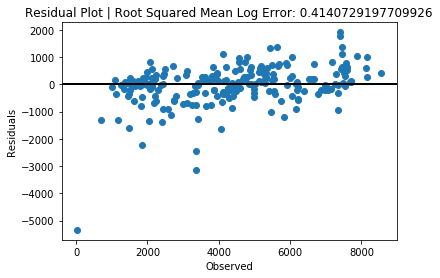

In [28]:
# Plot the residuals

def rmsle(y_test, y_pred):
    return np.sqrt(np.mean((np.log1p(y_pred) - np.log1p(y_test))**2))


residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Log Error: ' + str(rmsle(y_test, y_pred)))
plt.savefig('Figure9.png')
plt.show()



In [29]:
print("RMSLE: ", rmsle(y_test, y_pred))

RMSLE:  0.4140729197709926


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
my_model = DecisionTreeRegressor()
my_model.fit(X_train, y_train)
y_pred = my_model.predict(X_test)   

In [31]:
print (mean_absolute_error(y_test,y_pred)) 
print("Mean squared error: %.2f" % mean_squared_error(y_test,y_pred))

673.7923497267759
Mean squared error: 810130.50


In [32]:
print("RMSLE: ", rmsle(y_test,y_pred))

RMSLE:  0.33445761935335333


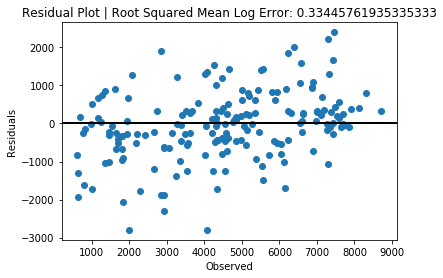

In [34]:
residuals = y_test-y_pred
fig, ax = plt.subplots()
ax.scatter(y_test, residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text('Residual Plot | Root Squared Mean Log Error: ' + str(rmsle(y_test,y_pred)))
plt.savefig('Figure10.png')
plt.show()